# Integrated Project

Maria Shemyakina

## Project description
You work for the online store Ice, which sells videogames all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This allows you to put your money on a potentially hot new item and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.
The data set contains the abbreviation ESRB (Entertainment Software Rating Board). The ESRB evaluates a game's content and assigns an appropriate age categories, such as Teen and Mature.



### Data description
    —Name
    —Platform
    —Year_of_Release
    —Genre
    —NA_sales (North American sales in USD million)
    —EU_sales (sales in Europe in USD million)
    —JP_sales (sales in Japan in USD million)
    —Other_sales (sales in other countries in USD million)
    —Critic_Score (maximum of 100)
    —User_Score (maximum of 10)
    —Rating (ESRB)
    Data for 2016 may be incomplete.

## Table of content <a class="anchor" id="7"></a>
* [Step 1. Open the data file and study the general information](#1)
* [Step 2. Prepare the data](#2)
* [Step 3. Analyze the data](#3)
* [Step 4. Create a user profile for each region](#4)
* [Step 5. Test the following hypotheses:](#5)
* [Summary](#6)

# Step 1. Open the data file and study the general information <a class="anchor" id="1"></a>




In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb


import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('games.csv')


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
games.duplicated().sum()

0

In [7]:
games.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [8]:
games.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
games.Critic_Score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [88]:
games.describe(include = 'object')

,name,platform,genre,rating
count,16444,16444,16444,16444
unique,11426,31,12,8
top,Need for Speed: Most Wanted,PS2,Action,Unknown
freq,12,2127,3307,6677


## Conclusion
As we can see,that we have a lot of missing data in Critic_Score (51.3%), User_Score(40.1%), Rating (40.5%) and Year_of_Realease (1.6%). Also, we have a lot of zeros in NA_sales,EU_sales, JP_sales,Other_sale. The value tbd (to be determined) was found in the User_Score field, and it should be replaced. Also, we have to change some types of data.

# Step 2. Prepare the data  <a class="anchor" id="2"></a>

I want to rename Year_of_Release, because it's too long

In [11]:
games.rename(columns={'Year_of_Release': 'Year'}, inplace=True)

In [12]:
games.head()

,Name,Platform,Year,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let's process the missing data and convert them to the correct types

In [13]:
#it's just a 1.6% of missing data, so I decided to drop it
games.dropna(subset = ['Year'], inplace = True)

In [14]:
games['Year'] = games['Year'].astype('int16')

In [15]:
# replace the column names (make them lowercase)
games.columns = games.columns.str.lower()

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name            16444 non-null object
platform        16446 non-null object
year            16446 non-null int16
genre           16444 non-null object
na_sales        16446 non-null float64
eu_sales        16446 non-null float64
jp_sales        16446 non-null float64
other_sales     16446 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
rating          9768 non-null object
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


In [17]:
games[games['name'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
games[games['genre'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These rows match, plus there are a lot of omissions in other columns as well. I believe that it is possible to get rid of them painlessly.

In [19]:
games.dropna(subset = ['name'], inplace = True)

In [20]:
games.dropna(subset = ['genre'], inplace = True)

In [21]:
games.isna().sum().sort_values(ascending = False)

critic_score    8461
rating          6676
user_score      6605
other_sales        0
jp_sales           0
eu_sales           0
na_sales           0
genre              0
year               0
platform           0
name               0
dtype: int64

In [22]:
games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Let's look at the rating column. We have some NANs here and RP ('Rating Pending'). I've decided to replace it into 'Unknown'

In [23]:
games['rating'] = games['rating'].fillna('Unknown')
games['rating'].isna().sum()
games.loc[games['rating'] == 'RP', 'rating'] = 'Unknown'

In [24]:
games.rating.unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

The value tbd (to be determined) was found in the user_score field, and it should be replaced. I decided to replace it by nan, becuse tdb means, that rating doesn't exist yet

In [25]:
games.loc[games['user_score']=='tbd', 'user_score'] = float('nan')

In [26]:
games['user_score'] = games['user_score'].astype('float', errors='ignore')

Let's calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [27]:

games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

In [28]:
games.head(5)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


## Conclusion

We processed some of the missing data, renamed the columns for our convenience, and changed the type of some of the data.

# Step 3. Analyze the data <a class="anchor" id="3"></a>


## Look at how many games were released in different years. Is the data for every period significant? 

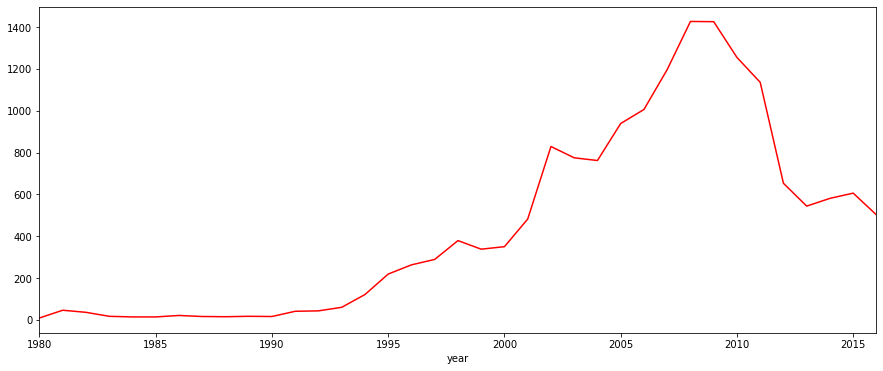

In [29]:
games.groupby('year')['year'].count().plot(figsize = (15,6), color = 'r')


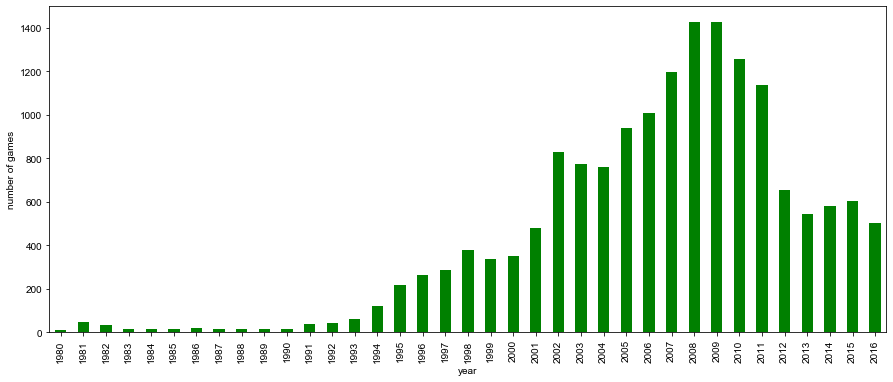

In [30]:
games.groupby('year')['year'].count().plot(kind='bar', figsize=(15,6), color = 'g')
sb.set()
sb.set_palette('Set2')
plt.ylabel('number of games')
plt.show()

The chart clearly shows the peak, which falls on the period 2008-2010. Let's see if this is true

In [31]:
games['year'].value_counts().head(10)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: year, dtype: int64

### Indeed, the largest number of games were released in the period of 2008-2009 and since 2010 has gone down

To evaluate the modern gaming industry, it makes no sense to consider the entire time period. Based on the chart data, let's take the last 5 years of 2011-2016 for the estimated period.

### Look at how sales varied from platform to platform. 

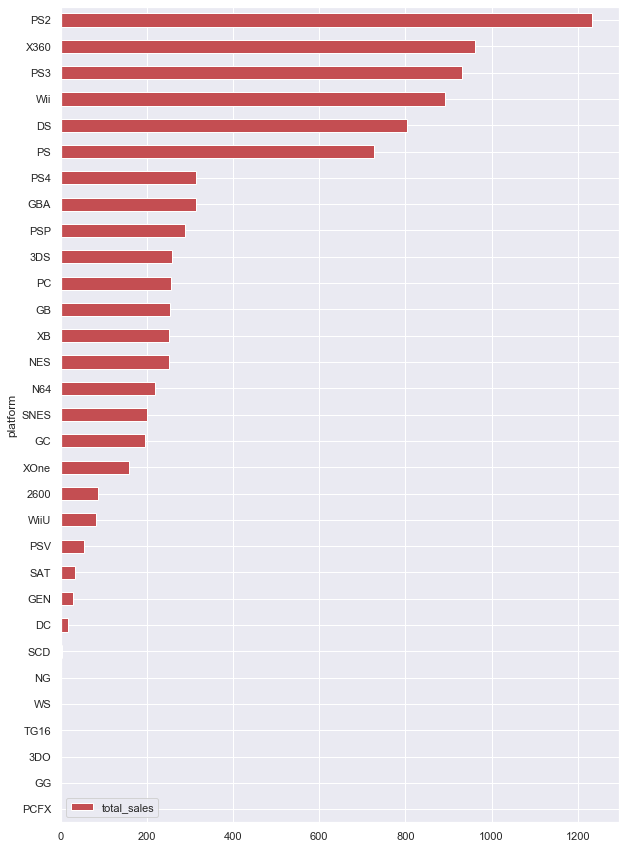

In [32]:
platform_pivot = (games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    )
platform_pivot.plot(kind='barh', figsize=(10,15), color = 'r')
plt.show()

In [33]:
best_sales = platform_pivot.sort_values(by='total_sales', ascending=False)[0:6].index
best_sales

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [34]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Most popular by total sales is PS2, X360, PS3 etc.

### Let's look at the total sales by year 

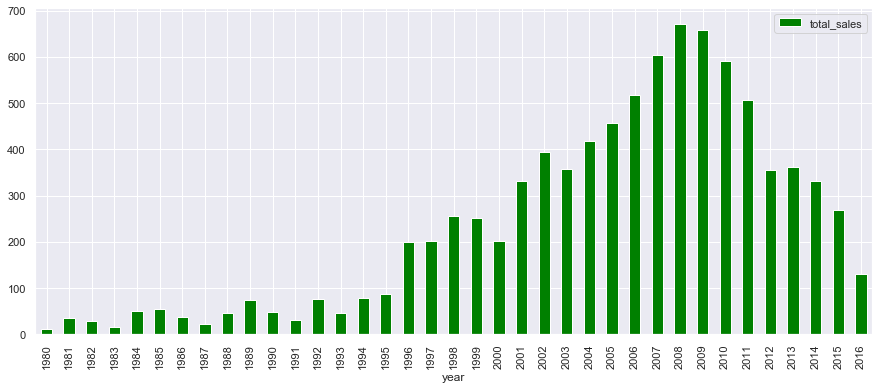

In [35]:
games.groupby('year').agg({'total_sales':'sum'}).plot(kind='bar', figsize=(15,6), color = 'green', grid = True) 

### The chart shows that sales peaked in 2008-09,after which they declined.

Since our estimated period is 2011-2016, we will select these rows in a separate table.

In [36]:
games_est = games.query('2011 <= year <= 2016')
games_est.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [37]:
games_est['platform'].value_counts().sort_values(ascending=False).head()

PS3     708
3DS     512
X360    498
PSV     429
PS4     392
Name: platform, dtype: int64

In [38]:
len(games_est.platform.unique())

12

In [39]:
len(games.platform.unique())

31

In the actual period, games were released only on 12 platforms, and for the entire period since 1980, there were 31. Many gaming platforms are completely outdated, so we do not take them into account in the forecast for 2017.

We will use only this actual dataset below

In [40]:
games_est['user_score'] = games_est['user_score'].fillna(0)

In [41]:
games_est['critic_score'] = games_est['critic_score'].fillna(0)

In [42]:
games_est['temp'] = np.where(((games_est['critic_score'] == 0) & (games_est['user_score'] ==0)), '0', '1')

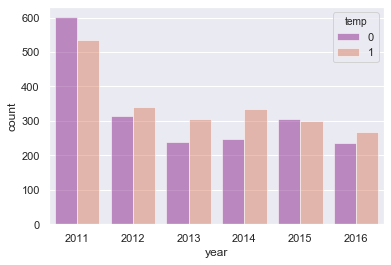

In [43]:
ax = sb.countplot(x='year', data=games_est, hue='temp', alpha= 0.5, palette='plasma')
sb.set(rc={'figure.figsize':(20,12)})

As we can see, starting in 2011, the number of reviews began to decline.

### Let's find out a most popular genre

In [44]:
games_est['genre'].value_counts().sort_values(ascending=False).head()

Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Name: genre, dtype: int64

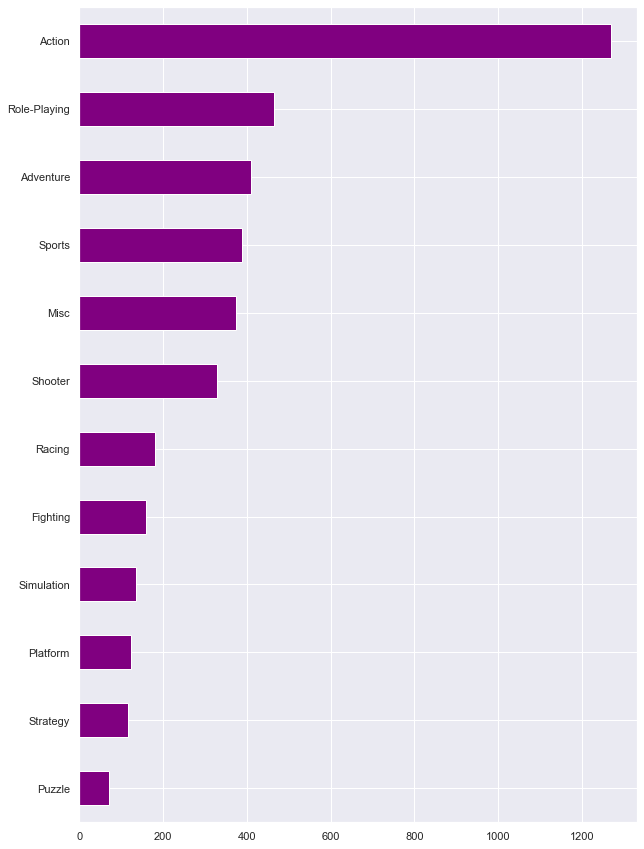

In [45]:
games_est['genre'].value_counts().sort_values(ascending=True).plot(kind = 'barh', figsize=(10,15), color = 'purple')

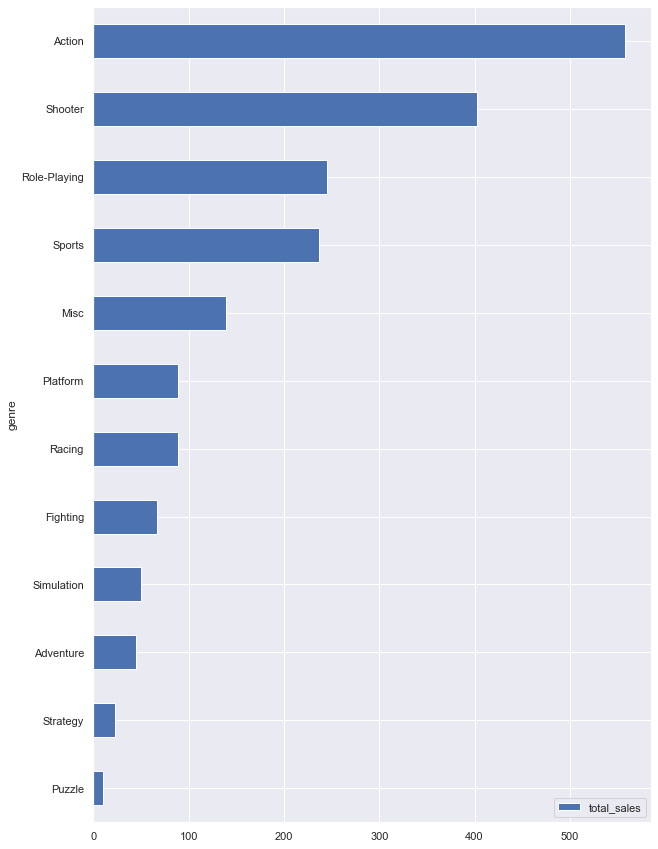

In [46]:
games_est.groupby('genre')['total_sales'].sum().sort_values(ascending=True).plot(kind='barh',figsize=(10,15),  legend=True)
plt.show()

### Most of the games of the Action genre, followed by a large margin are role-playing games. But, when we look at this genre group by total_sales, Action is still a leader, but second place took Shooter games. 
Let's look at the games with the highest rating from users and at the games with the highest  rating from critics

In [47]:
games_est.sort_values('critic_score', ascending = False).head(10)[['name','critic_score']]

,name,critic_score
16,Grand Theft Auto V,97.0
23,Grand Theft Auto V,97.0
165,Grand Theft Auto V,97.0
42,Grand Theft Auto V,97.0
1730,Grand Theft Auto V,96.0
164,Batman: Arkham City,96.0
75,The Elder Scrolls V: Skyrim,96.0
2703,Portal 2,95.0
1052,Portal 2,95.0
808,Portal 2,95.0


In [48]:
games_est.sort_values('user_score',  ascending = False).head(10)[['name','user_score']]

,name,user_score
2851,The Witcher 3: Wild Hunt,9.3
10959,Steins;Gate 0,9.3
303,The Witcher 3: Wild Hunt,9.2
10707,Steins;Gate,9.2
1831,Persona 4: Golden,9.2
1499,The Witcher 3: Wild Hunt,9.2
848,Fire Emblem: Awakening,9.1
149,The Last of Us,9.1
110,Mario Kart 8,9.1
260,Super Mario 3D World,9.0


I consider a relationship without zero ratings to be more representative, so I will plot the relationship with this condition

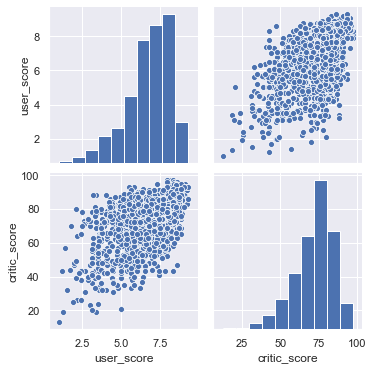

In [49]:
sb.pairplot(games_est.query('user_score!= 0 & critic_score != 0')[['user_score','critic_score']], palette = 'Set1')

Let's find a top games by total sales

In [50]:
top_games = games_est.groupby('name')['total_sales'].sum().sort_values(ascending=False)[0:10]
top_games

name
Grand Theft Auto V                56.58
Call of Duty: Modern Warfare 3    30.60
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.39
Call of Duty: Black Ops 3         25.67
Minecraft                         24.16
Call of Duty: Advanced Warfare    21.97
The Elder Scrolls V: Skyrim       21.14
FIFA 15                           17.37
Battlefield 3                     17.27
Name: total_sales, dtype: float64

In [51]:
games_est.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64

Most popular by total sales in current dataset is PS2, X360, PS4 instead of PS3 and 3DS instead of Wii.

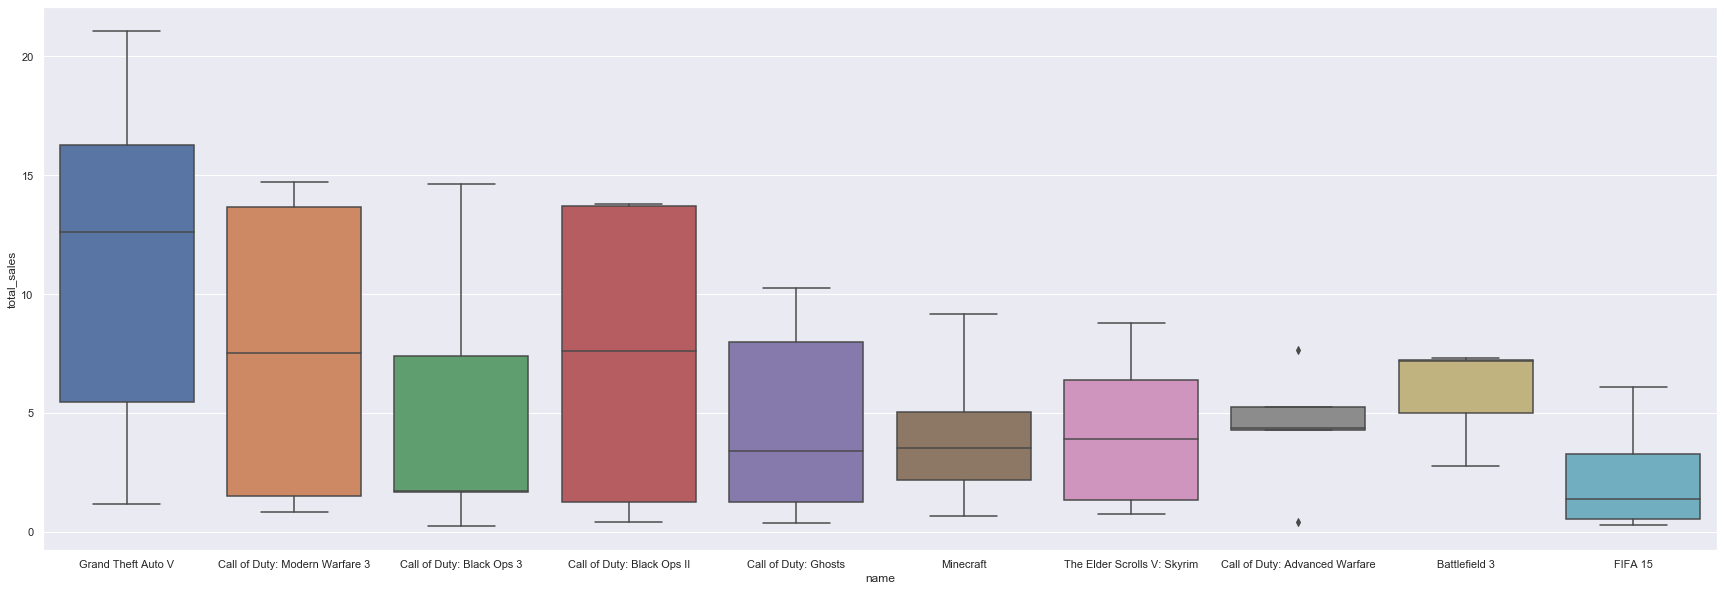

In [52]:
plt.figure(figsize=(30,10))
sb.boxplot(data=games_est.query('name in @top_games.index'), x='name', y='total_sales')
plt.show()

In [53]:
# find out genre of top games
games_est.query('name in @top_games.index').genre.unique()

array(['Action', 'Shooter', 'Misc', 'Role-Playing', 'Sports'],
      dtype=object)

In [54]:
# find out platforms that produce the top games 
platforms_top_games = games_est.query('name in @top_games.index')['platform'].unique()

platforms_top_games

array(['PS3', 'X360', 'PS4', 'XOne', 'PC', 'PSV', 'Wii', 'WiiU', '3DS'],
      dtype=object)

### Let's evaluate the impact of user and critic reviews on sales within a popular platform.

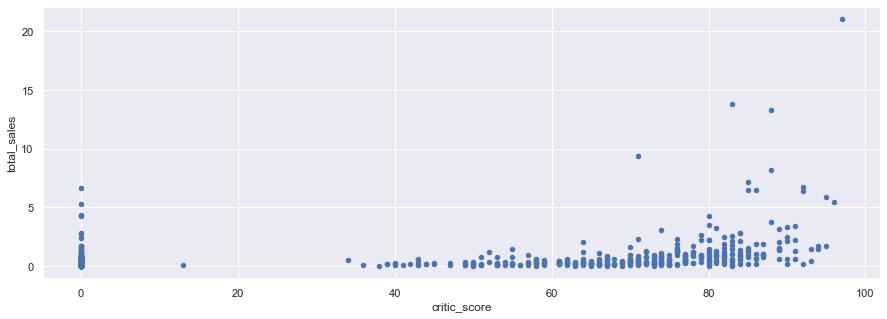

In [55]:
# for critic_score
games_est.query('platform=="PS3"').plot(kind='scatter', figsize=(15,5), x='critic_score', y='total_sales', color = 'b')
plt.show()

In [56]:
games_est.query('platform=="PS3"')['critic_score'].corr(games_est.query('platform=="PS3"')['total_sales'])

0.3243301424233191

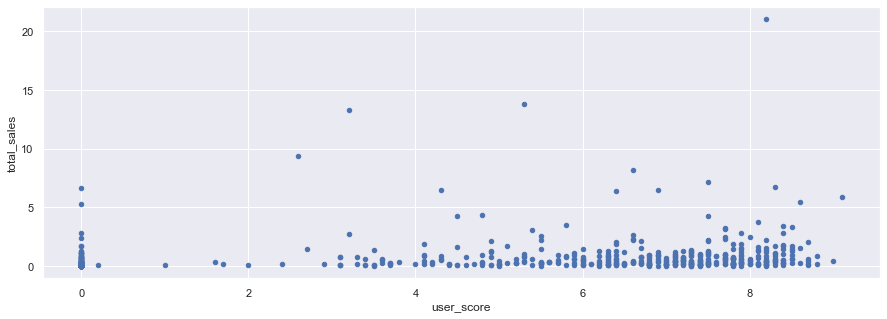

In [57]:
#for users_score
games_est.query('platform=="PS3"').plot(kind='scatter', figsize=(15,5), x='user_score', y='total_sales', color = 'b')
plt.show()

In [58]:
games_est.query('platform=="PS3"')['user_score'].corr(games_est.query('platform=="PS3"')['total_sales'])

0.2298748141653216

We see that there is a weak positive dependence of sales on the evaluation of critic_score, but there is no dependence on the evaluation of user_score.

### Let's look at the another platforms

In [59]:
games_plat = games_est['platform'].unique()
for platform in games_plat:
    temp = games_est.query('platform==@platform')
    print(platform,'correlation:',temp['critic_score'].corr(temp['total_sales']))

PS3 correlation: 0.3243301424233191
X360 correlation: 0.315660752113588
PS4 correlation: 0.22754960627752666
3DS correlation: 0.16702057976149176
Wii correlation: 0.33282627234959367
DS correlation: 0.1387116480663382
XOne correlation: 0.2748391874944539
WiiU correlation: 0.29812398749349167
PC correlation: 0.2567424611747898
PSV correlation: 0.40339691283276585
PSP correlation: 0.395188101382604
PS2 correlation: nan


We can see that there is a weak positive dependence of sales on the evaluation of critic_score

In [60]:
games_plat_2 = games_est['platform'].unique()
for platform in games_plat_2:
    temp = games_est.query('platform==@platform')
    print(platform,'correlation:',temp['user_score'].corr(temp['total_sales']))

PS3 correlation: 0.2298748141653216
X360 correlation: 0.17816318969450226
PS4 correlation: 0.11311562450852886
3DS correlation: 0.15005339360609843
Wii correlation: 0.37694672571898785
DS correlation: 0.13676721477424522
XOne correlation: 0.11656261405851895
WiiU correlation: 0.27114031910780045
PC correlation: 0.11863823596083098
PSV correlation: 0.3769021819697889
PSP correlation: 0.3549472182837215
PS2 correlation: 0.5555802542055748


As we can see is no (or weak) dependence on the evaluation of user_score.

## Conclusion.

We determined the actual period (2011-2016) and make a new dataset. We identified the top 5 most popular platforms and  best-selling games, for every popular game, the same platforms are the top sellers. We determined that the largest number of games released in the "action" genre, the same genre was also the most profitable. We determined that for all platforms  is a positive correlation between the critic_score and sales, and there is no correlation between the user_score and sales


# Step 4. Create a user profile for each region <a class="anchor" id="4"></a>


### Find the TOP-5 for European sales

In [61]:
games_est.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64

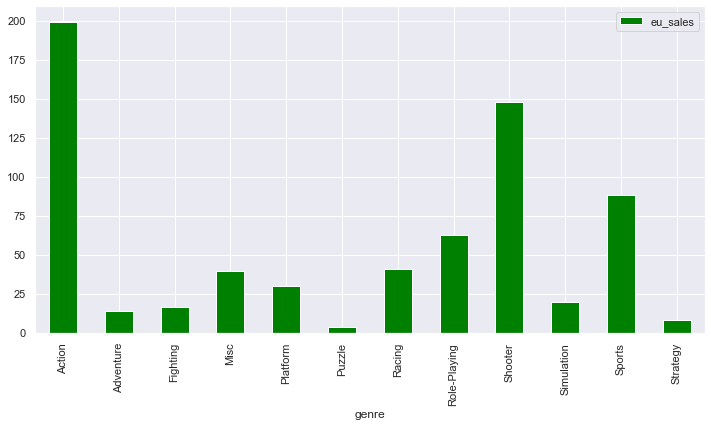

In [62]:
games_est.groupby('genre').agg({'eu_sales':'sum'}).plot(kind='bar', color = 'green', grid = True, figsize = (12,6)) 

In Europe they prefer action games

### TOP-5 Japan

In [63]:
games_est.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64

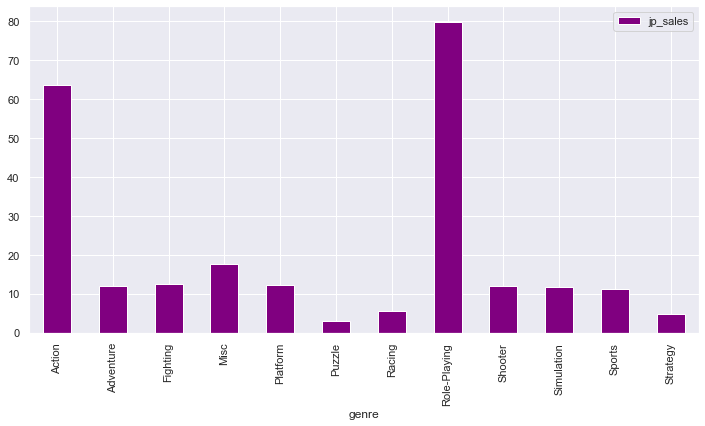

In [64]:
games_est.groupby('genre').agg({'jp_sales':'sum'}).plot(kind='bar', color = 'purple', grid = True, figsize = (12,6)) 

In Japan they prefer Role-Playing games

### TOP-5 USA

In [65]:
games_est.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64

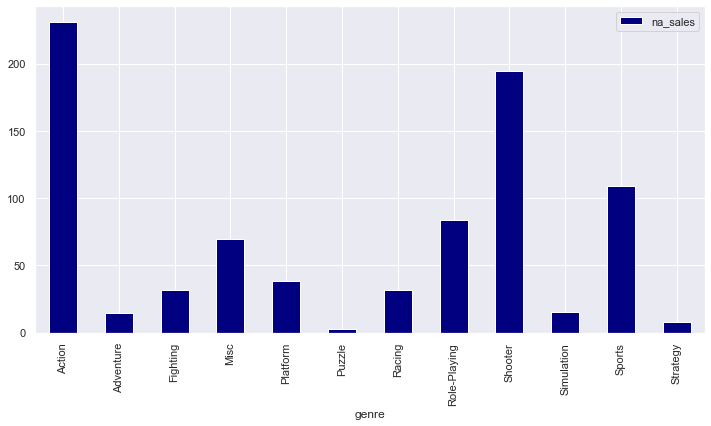

In [66]:
games_est.groupby('genre').agg({'na_sales':'sum'}).plot(kind='bar', color = 'navy', grid = True, figsize = (12,6)) 

In USA they prefer action games

## Let's look at sales information in Europe, Japan, and America

### Europe

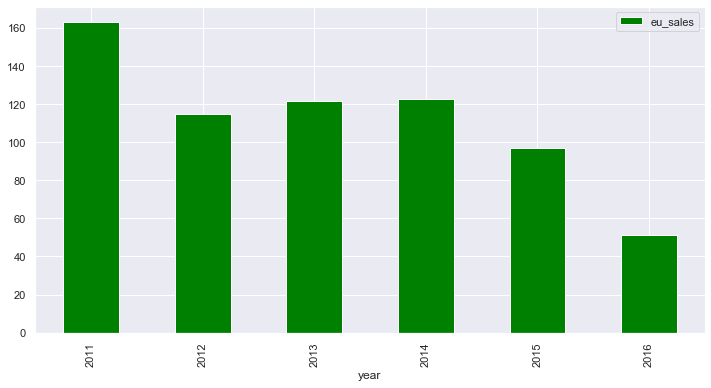

In [67]:
games_est.groupby('year').agg({'eu_sales':'sum'}).plot(kind='bar', color = 'green', grid = True, figsize = (12,6)) 

The best selling year in Europe was 2011

### Japan

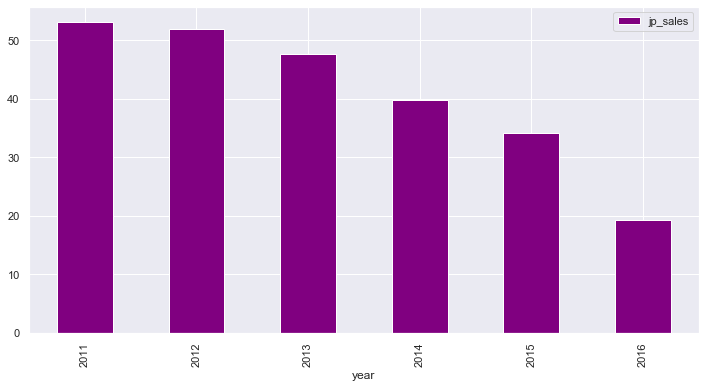

In [68]:
games_est.groupby('year').agg({'jp_sales':'sum'}).plot(kind='bar', color = 'purple', grid = True, figsize = (12,6)) 

The best selling year in Japan was also 2011

### USA

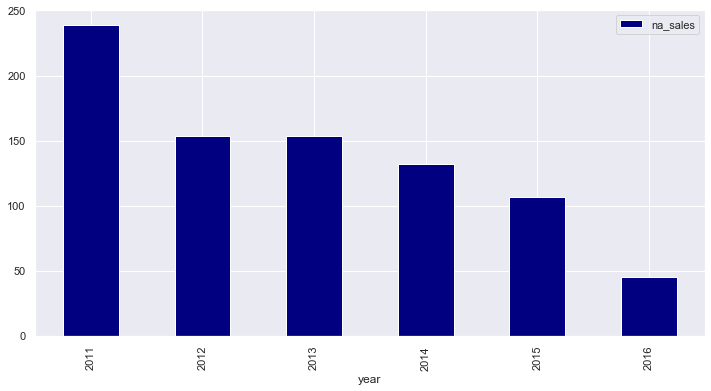

In [69]:
games_est.groupby('year').agg({'na_sales':'sum'}).plot(kind='bar', color = 'navy', grid = True, figsize = (12,6)) 

The best selling year in USA was also 2011

## Let's see the top 5 preferred platforms

### Europe

In [70]:
games_est.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

 Most popular platform in the EU is PS3

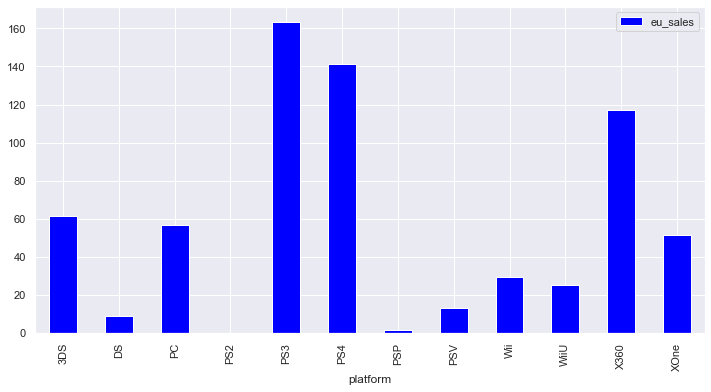

In [71]:
games_est.groupby('platform').agg({'eu_sales':'sum'}).plot(kind='bar', color = 'blue', grid = True, figsize = (12,6)) 

### Japan

In [72]:
games_est.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

Most popular platform in the Japan is  3DS

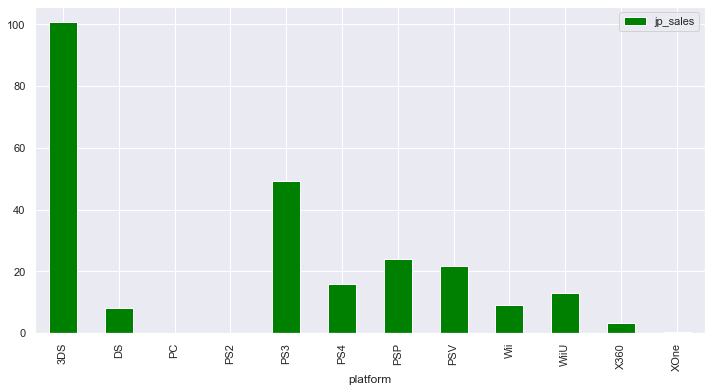

In [73]:
games_est.groupby('platform').agg({'jp_sales':'sum'}).plot(kind='bar', color = 'green', grid = True, figsize = (12,6)) 

### USA

In [74]:
games_est.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

Most popular platform in the USA is X360

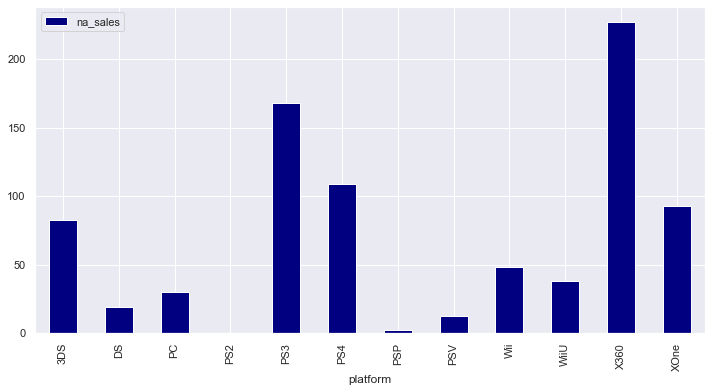

In [75]:
games_est.groupby('platform').agg({'na_sales':'sum'}).plot(kind='bar', color = 'navy', grid = True, figsize = (12,6))

## Let's see which ESRB rating is most common

EU

In [76]:
games_est.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()

rating
M          250.26
E          141.73
Unknown    116.64
T           83.16
E10+        78.00
Name: eu_sales, dtype: float64

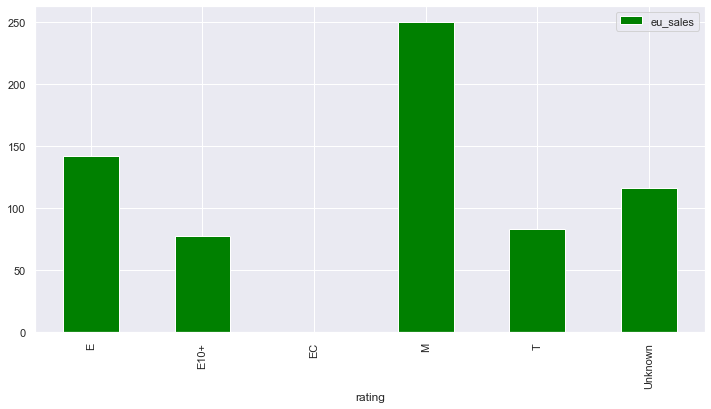

In [77]:
games_est.groupby('rating').agg({'eu_sales':'sum'}).plot(kind='bar', color = 'green', grid = True, figsize = (12,6))

Japan

In [78]:
games_est.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()

rating
Unknown    138.21
E           36.68
T           33.39
M           26.14
E10+        11.23
Name: jp_sales, dtype: float64

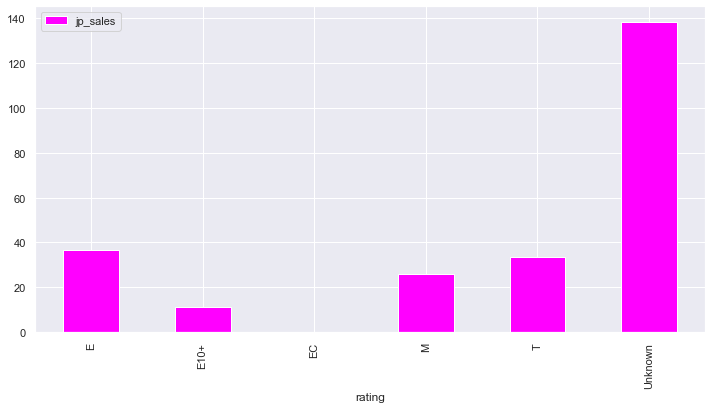

In [79]:
games_est.groupby('rating').agg({'jp_sales':'sum'}).plot(kind='bar', color = 'magenta', grid = True, figsize = (12,6))

USA

In [80]:
games_est.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()

rating
M          308.45
E          170.17
Unknown    123.69
E10+       117.72
T          109.31
Name: na_sales, dtype: float64

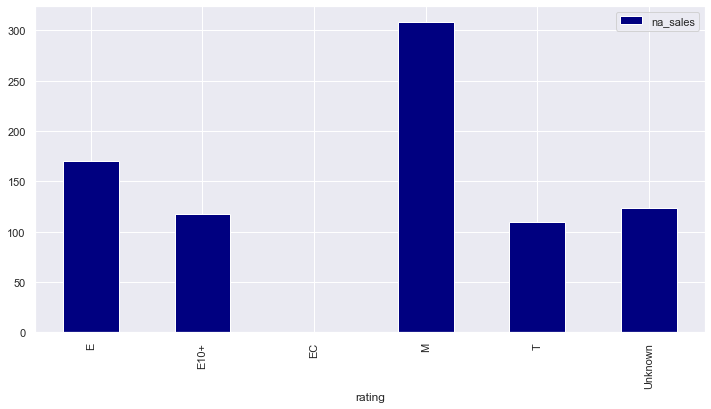

In [81]:
games_est.groupby('rating').agg({'na_sales':'sum'}).plot(kind='bar', color = 'navy', grid = True, figsize = (12,6))

### The most popular rating in EU and USA is M, in Japan the most popular is unknown (maybe they don't like make a reviews for games?) 

# Step 5. Test the following hypotheses:<a class="anchor" id="5"></a>
    * —Average user ratings of the Xbox One and PC platforms are the same.
    * —Average user ratings for the Action and Sports genres are different.


Let's test the hypothesis that the average user rating of Xbox One and PC platforms are the same

- H0: mean(user_score for Xbox One platform) = mean(user_score for PC platform)
- H1: mean(user_score for Xbox One platform) != mean(user_score for PC platform)
- alpha = .05¶

In [82]:
from scipy import stats as st

def test(df1, df2):
    alpha = .05
    results = st.ttest_ind(games_est[(games_est['platform']=='XOne') & (games['user_score'] != 0)]['user_score'], games_est[(games_est['platform']=='PC') & (games_est['user_score'] != 0)]['user_score'], equal_var = False)
    if (results.pvalue < alpha):
        return(print("Rejecting the null hypothesis" ))
    else:
        return(print("We can't reject the null hypothesis." ))
    

In [83]:
XOne = games_est[games_est['platform']=='XOne']['user_score']
PC = games_est[games_est['platform']=='PC']['user_score']
test(XOne,PC)

Rejecting the null hypothesis


In [84]:
games_est[(games_est['user_score']!=0) & (games_est['platform'].isin(['XOne', 'PC']))]\
.groupby('platform')['user_score'].mean()

platform
PC      6.451792
XOne    6.521429
Name: user_score, dtype: float64

Average (user_score) for PC is 6.451792 and for XOne is 6.521429

Let's test the hypothesis that the average user rating of the Action and Sports genres differs.

In [85]:
def test2(df1, df2):
    alpha = .05
    results = st.ttest_ind(games_est[(games_est['genre']=='Action') & (games_est['user_score'] != 0)]['user_score'], games_est[(games_est['genre']=='Sports') & (games_est['user_score'] != 0)]['user_score'], equal_var = False)
    if (results.pvalue < alpha):
        return(print("Rejecting the null hypothesis" ))
    else:
        return(print("We can't reject the null hypothesis." ))
    

In [86]:
Action = games_est[games_est['genre']=='Action']['user_score']
Sports = games_est[games_est['genre']=='Sports']['user_score']
test2(Action,Sports)

Rejecting the null hypothesis


In [87]:
games_est[(games_est['user_score']!=0) & (games_est['genre'].isin(['Action', 'Sports']))]\
.groupby('genre')['user_score'].mean()

genre
Action    6.775904
Sports    5.650813
Name: user_score, dtype: float64

Average (user_score) for Action 6.77, а для Sports 5.65

# Summary <a class="anchor" id="6"></a>

While working on the project, preliminary data analysis was performed, column names were replaced, variables were adjusted to the appropriate types, the number of sales in all regions was calculated and recorded in a separate column. Have been processed and replaced in the blanks. A research analysis of the data was conducted, which determined the distribution by year of release, by sales, by platform and genre, and found the games with the highest and lowest ratings from critics. We have compiled a portrait of players from Japan, Europe and America. We also tested hypotheses. 
The project was interesting and clearly described, and also captured all the areas of knowledge that were studied during the first module.

* [TOP](#7)